In [1]:
import os
import cv2
import shutil
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cpu (CPU)


In [3]:
os.chdir('F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5/')

In [4]:
model = torch.hub.load('.', 'custom', path='F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3/best.pt', source='local')

YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [5]:
images = 'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images/'

for img in os.listdir(images):
    try:
        img_path = os.path.join(images, img)
        result = model(img_path)
        crops = result.crop(save=True)
    except (OSError, cv2.error) as e:
        print(f"Error processing image {img}: {e}")
        continue

WARNING  NMS time limit 0.550s exceeded
Saved 1 image to runs\detect\exp
Saved results to runs\detect\exp



In [6]:
directory = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5\runs\detect'

for filename in os.listdir(directory):
    for crops in os.listdir(os.path.join(directory, filename)):
        if crops == "crops":
            for plate in os.listdir(os.path.join(directory, filename, crops)):
                for img in os.listdir(os.path.join(directory, filename, crops, plate)):
                    img_path = os.path.join(directory, filename, crops, plate, img)
                    image = cv2.imread(img_path)
                    saved_img_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images'
                    # print(img)
                    cv2.imwrite(r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images' + "//" + img, image)

In [7]:
input_folder = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images'
output_folder = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
# Iterate over the files in the input folder
for filename in os.listdir(input_folder):
    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)

    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Read the image
        image = cv2.imread(input_path)

        # Check if the image was successfully read
        if image is not None:
            ratio = 600 / image.shape[1]
            width = round(image.shape[1] * ratio)
            height = round(image.shape[0] * ratio)

            # Resize the image
            resized_image = cv2.resize(image, (width, height))

            # Save the resized image to the output folder
            cv2.imwrite(output_path, resized_image)
            print(f"Resized image saved: {output_path}")
        else:
            print(f"Failed to read image: {input_path}")
    else:
        print(f"Skipping non-image file: {input_path}")

Resized image saved: F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images\2.jpg


In [8]:
rec_model = torch.hub.load('.', 'custom', path=r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\recognition_model/best.pt', source='local')

YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


In [9]:
# model_result = {}  # Use a dictionary instead of a list

# # Specify the path to your input image
# image_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images\2.jpg'

# # Perform object detection on the image
# results = rec_model(image_path)

# # Get the predicted labels and bounding box coordinates
# labels = results.xyxyn[0][:, -1].cpu().numpy()
# boxes = results.xyxyn[0][:, :-1].cpu().numpy()

# # Get the class names associated with the model
# class_names = rec_model.module.names if hasattr(rec_model, 'module') else rec_model.names

# # Reverse the order of labels and bounding boxes
# reversed_labels = labels[::-1]
# reversed_boxes = boxes[::-1]

# # Iterate over the reversed bounding box coordinates and labels
# for label, box in zip(reversed_labels, reversed_boxes):
#     # Get the label name using the model's class names
#     label_name = class_names[int(label)]

#     # Store the label name and reversed bounding box in the model_result dictionary
#     model_result[label_name] = box[0]

# # Print the model_result dictionary
# print(model_result)

{'alif': 0.6939218, 'five': 0.38427022, 'yaa': 0.52648526, 'eight': 0.051604286, 'four': 0.27911872, 'seven': 0.16957775, 'seen': 0.79990816}


In [10]:
model_result = {}  # Use a dictionary instead of a list

# Specify the path to your input image
image_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images\2.jpg'

# Perform object detection on the image
results = rec_model(image_path)

# Get the predicted labels and bounding box coordinates
labels = results.xyxyn[0][:, -1].cpu().numpy()
boxes = results.xyxyn[0][:, :-1].cpu().numpy()

# Get the class names associated with the model
class_names = recognition_model.module.names if hasattr(rec_model, 'module') else rec_model.names

# Iterate over the bounding box coordinates and labels
for label, box in zip(labels, boxes):
    # Get the label name using the model's class names
    label_name = class_names[int(label)]

    # Check if the label name already exists in the model_result dictionary
    if label_name in model_result:
        # If the label name already exists, append the new bounding box to the existing list
        model_result[label_name].append(box[0])
    else:
        # If the label name doesn't exist, create a new entry in the dictionary with the bounding box as a list
        model_result[label_name] = [box[0]]

# Print the model_result dictionary
print(model_result)

{'seen': [0.79990816], 'seven': [0.16957775], 'four': [0.27911872], 'eight': [0.051604286], 'yaa': [0.52648526], 'five': [0.38427022], 'alif': [0.6939218]}


In [11]:
lst = []
for label, box in zip(reversed_labels, reversed_boxes):
    # Get the label name using the model's class names
    label_name = class_names[int(label)]

    lst.append(box[0])

lst.sort()  # Sort the list of bounding boxes in ascending order

# Initialize an empty list to store the matching keys
matching_keys = []

# Iterate over the elements in lst
for item in lst:
    found_match = False
    for key, value in model_result.items():
        if np.allclose(value, item):
            matching_keys.append(key)
            found_match = True
            break
    if not found_match:
        # Check if the item matches any array value element-wise
        for key, value in model_result.items():
            if any(np.allclose(v, item) for v in value):
                matching_keys.append(key)
                break

# Print the matching keys
print(matching_keys)

['eight', 'seven', 'four', 'five', 'yaa', 'alif', 'seen']


In [12]:
replace_arabic_characters_and_digits = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
                                        "alif":"أ", "baa":"ب", "geem":"ج", "daal":"د", "raa":"ر", "seen":"س", "saad":"ص", "taa":"ط",
                                        "ein":"ع", "faa":"ف", "qaaf":"ق", "laam":"ل", "meem":"م", "noon":"ن", "haa":"ه", "waaw":"و", "yaa":"ي"}

In [13]:
# Initialize an empty list to store the corresponding values
matching_values = []

# Iterate over the keys in matching_keys
for key in matching_keys:
    if key in replace_arabic_characters_and_digits:
        value = replace_arabic_characters_and_digits[key]
        matching_values.append(value)

# Print the matching values
print(matching_values)

[8, 7, 4, 5, 'ي', 'أ', 'س']


In [14]:
numbers = ''
characters = ''

for item in matching_values:
    if isinstance(item, int):
        numbers += str(item)
    elif isinstance(item, str):
        characters += item
        separated_characters = list(characters[::-1])

result_list = [numbers, separated_characters]

In [15]:
result_list

['8745', ['س', 'أ', 'ي']]

In [16]:
replace_first_element = {"س": "الإسكندرية", "ر": "الشرقية", "د":"الدقهلية", "م":"المنوفية","ب":"البحيرة","ل":"كفر الشيخ", "ع":"الغربية", "ق":"القليوبية",
                         "ف":"الفيوم", "و":"بني سويف", "ن":"المنيا","ي":"أسيوط", "ه":"سوهاج"}

replace_second_element_if_first_geem = {"ه": "مطروح", "ب":"الوادي الجديد"}

replace_second_element_if_first_saad = {"أ": "قنا", "ق":"الأقصر", "و":"أسوان"}

replace_second_element_if_first_taa = {"س":"السويس", "ص":"الاسماعيلية", "ع":"بورسعيد", "د":"دمياط", "أ":"شمال سيناء", "ج":"جنوب سيناء", "ر":"البحر الأحمر"}

first_char = result_list[1][0]
sec_char = result_list[1][1]

if len(result_list[0]) == 3 and len(result_list[1]) == 3:
    value = "القاهرة"
elif len(result_list[0]) == 4 and len(result_list[1]) == 2:
    value = "الجيزة"
else:
    if first_char == "ج":
        value = replace_second_element_if_first_geem[sec_char]
    elif first_char == "ص":
        value = replace_second_element_if_first_saad[sec_char]
    elif first_char == "ط":
        value = replace_second_element_if_first_taa[sec_char]
    else:
        value = replace_first_element[first_char]

result_list.append(value)

print(result_list)

['8745', ['س', 'أ', 'ي'], 'الإسكندرية']


In [18]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

['8745', ['س', 'أ', 'ي'], 'الإسكندرية']


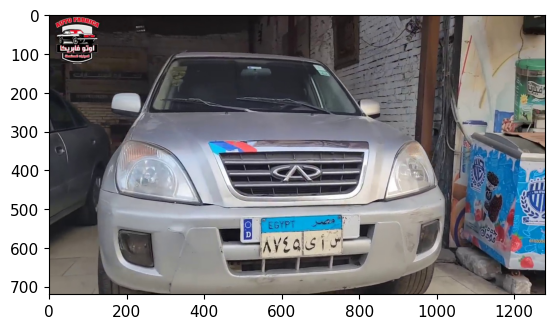

In [21]:
print(result_list)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\2.jpg")
imgplot = plt.imshow(img)
plt.show()

In [2]:
def apply_detection_model_and_save_results(model, images_path):
    for img in os.listdir(images):
        try:
            img_path = os.path.join(images_path, img)
            result = model(img_path)
            crops = result.crop(save=True)
        except (OSError, cv2.error) as e:
            print(f"Error processing image {img}: {e}")
            continue
    return 

In [150]:
os.chdir('F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5/')

detection_model =torch.hub.load('.', 'custom', path='F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3/best.pt', source='local')

recognition_model = torch.hub.load('.', 'custom', path=r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\recognition_model/best.pt', source='local')

YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2023-9-24 Python-3.11.3 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


In [597]:
images = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images/'

In [598]:
apply_detection_model_and_save_results(detection_model, images)

Saved 1 image to runs\detect\exp
Saved results to runs\detect\exp



In [16]:
def save_cropped_img(cropped_img_dir, saved_img_dir):
    for filename in os.listdir(cropped_img_dir):
        for crops in os.listdir(os.path.join(cropped_img_dir, filename)):
            if crops == "crops":
                for plate in os.listdir(os.path.join(cropped_img_dir, filename, crops)):
                    for img in os.listdir(os.path.join(cropped_img_dir, filename, crops, plate)):
                        img_path = os.path.join(cropped_img_dir, filename, crops, plate, img)
                        image = cv2.imread(img_path)
                        cv2.imwrite(saved_img_dir + "//" + img, image)
    return

In [599]:
cropped_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5\runs\detect'
saved_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images'

In [600]:
save_cropped_img(cropped_img_dir, saved_img_dir)

In [22]:
def resize_img(saved_img_dir, resized_img_dir):
    # Create the output folder if it doesn't exist
    os.makedirs(resized_img_dir, exist_ok=True)
    # Iterate over the files in the input folder
    for filename in os.listdir(saved_img_dir):
        input_path = os.path.join(saved_img_dir, filename)
        output_path = os.path.join(resized_img_dir, filename)

        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            # Read the image
            image = cv2.imread(input_path)

            # Check if the image was successfully read
            if image is not None:
                ratio = 600 / image.shape[1]
                width = round(image.shape[1] * ratio)
                height = round(image.shape[0] * ratio)

                # Resize the image
                resized_image = cv2.resize(image, (width, height))

                # Save the resized image to the output folder
                cv2.imwrite(output_path, resized_image)
                print(f"Resized image saved: {output_path}")
            else:
                print(f"Failed to read image: {input_path}")
        else:
            print(f"Skipping non-image file: {input_path}")

In [601]:
resized_img_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images'

In [602]:
resize_img(saved_img_dir, resized_img_dir)

Resized image saved: F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images\test.jpg


In [28]:
def return_position_for_each_char(image_path):
    
    images_folder_dir = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images'
    for img in os.listdir(images_folder_dir):
         image_path = images_folder_dir + "\\" + img
    
    model_result = {}  # Use a dictionary instead of a list

    # Perform object detection on the image
    results = recognition_model(image_path)

    # Get the predicted labels and bounding box coordinates
    labels = results.xyxyn[0][:, -1].cpu().numpy()
    boxes = results.xyxyn[0][:, :-1].cpu().numpy()

    # Get the class names associated with the model
    class_names = recognition_model.module.names if hasattr(recognition_model, 'module') else recognition_model.names

    # Iterate over the bounding box coordinates and labels
    for label, box in zip(labels, boxes):
        # Get the label name using the model's class names
        label_name = class_names[int(label)]

        # Check if the label name already exists in the model_result dictionary
        if label_name in model_result:
            # If the label name already exists, append the new bounding box to the existing list
            model_result[label_name].append(box[0])
        else:
            # If the label name doesn't exist, create a new entry in the dictionary with the bounding box as a list
            model_result[label_name] = [box[0]]

    # Print the model_result dictionary
    return model_result

In [603]:
image_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images'

In [604]:
model_result = return_position_for_each_char(image_path)

In [605]:
model_result

{'seen': [0.7674455],
 'five': [0.18030843],
 'two': [0.0825584],
 'six': [0.2816508],
 'three': [0.37795016],
 'yaa': [0.50760293],
 'haa': [0.65462995]}

In [606]:
model_result = {}  # Use a dictionary instead of a list

# Specify the path to your input image
image_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images\test.jpg'

# Perform object detection on the image
results = recognition_model(image_path)

# Get the predicted labels and bounding box coordinates
labels = results.xyxyn[0][:, -1].cpu().numpy()
boxes = results.xyxyn[0][:, :-1].cpu().numpy()

# Get the class names associated with the model
class_names = recognition_model.module.names if hasattr(recognition_model, 'module') else recognition_model.names

# Reverse the order of labels and bounding boxes
reversed_labels = labels[::-1]
reversed_boxes = boxes[::-1]

# Iterate over the reversed bounding box coordinates and labels
for label, box in zip(reversed_labels, reversed_boxes):
    # Get the label name using the model's class names
    label_name = class_names[int(label)]

    # Store the label name and reversed bounding box in the model_result dictionary
    model_result[label_name] = box[0]

# Print the model_result dictionary
print(model_result)

{'haa': 0.65462995, 'yaa': 0.50760293, 'three': 0.37795016, 'six': 0.2816508, 'two': 0.0825584, 'five': 0.18030843, 'seen': 0.7674455}


In [607]:
# Initialize an empty dictionary to store the results
model_result = {}

# Iterate over the reversed bounding box coordinates and labels
for label, box in zip(reversed_labels, reversed_boxes):
    # Get the label name using the model's class names
    label_name = class_names[int(label)]

    # Check if the label name already exists in the dictionary
    if label_name in model_result:
        # If the label name exists, append the bounding box to the existing list
        model_result[label_name].append(box[0])
    else:
        # If the label name doesn't exist, create a new list with the bounding box
        model_result[label_name] = [box[0]]

# Print the model_result dictionary
print(model_result)

{'haa': [0.65462995], 'yaa': [0.50760293], 'three': [0.37795016], 'six': [0.2816508], 'two': [0.0825584], 'five': [0.18030843], 'seen': [0.7674455]}


In [262]:
def return_sorted_plate_characters(model_result):
    lst = []
    for label, box in zip(reversed_labels, reversed_boxes):
        # Get the label name using the model's class names
        label_name = class_names[int(label)]

        lst.append(box[0])

    lst.sort()  # Sort the list of bounding boxes in ascending order

    # Initialize an empty list to store the matching keys
    matching_keys = []

    # Iterate over the elements in lst
    for item in lst:
        found_match = False
        for key, value in model_result.items():
            if np.allclose(value, item):
                matching_keys.append(key)
                found_match = True
                break
        if not found_match:
            # Check if the item matches any array value element-wise
            for key, value in model_result.items():
                if any(np.allclose(v, item) for v in value):
                    matching_keys.append(key)
                    break

    # Print the matching keys
    return matching_keys

In [110]:
# def return_sorted_plate_characters(model_result):
#     lst = []
#     for label, box in zip(reversed_labels, reversed_boxes):
#         # Get the label name using the model's class names
#         label_name = class_names[int(label)]
#         lst.append(box[0])

#     lst.sort()  # Sort the list of bounding boxes in ascending order

#     # Initialize an empty list to store the matching keys
#     matching_keys = []

#     # Iterate over the elements in lst
#     for item in lst:
#         found_match = False
#         for key, value in model_result.items():
#             if np.allclose(value, item):
#                 matching_keys.append(key)
#                 found_match = True
#                 break
#         if not found_match:
#             # Check if the item matches any array value element-wise
#             for key, value in model_result.items():
#                 if np.allclose(value, item):
#                     matching_keys.append(key)
#                     found_match = True
#                     break
#         if not found_match:
#             # Check if the item matches any array value element-wise
#             for key, value in model_result.items():
#                 if isinstance(value, np.ndarray) and any(np.allclose(v, item) for v in value):
#                     matching_keys.append(key)
#                     break

#     # Print the matching keys
#     return matching_keys

# matching_keys = return_sorted_plate_characters(model_result)

In [608]:
matching_keys = return_sorted_plate_characters(model_result)

In [609]:
matching_keys

['two', 'five', 'six', 'three', 'yaa', 'haa', 'seen']

In [621]:
replace_arabic_characters_and_digits = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
                                        "alif":"أ", "baa":"ب", "geem":"ج", "daal":"د", "raa":"ر", "seen":"س", "saad":"ص", "taa":"ط",
                                        "ein":"ع", "faa":"ف", "qaaf":"ق", "laam":"ل", "meem":"م", "noon":"ن", "haa":"ه", "waaw":"و", "yaa":"ي"}

In [617]:
# replace_arabic_characters_and_digits = {
#     "zero": "٠",
#     "one": "١",
#     "two": "٢",
#     "three": "٣",
#     "four": "٤",
#     "five": "٥",
#     "six": "٦",
#     "seven": "٧",
#     "eight": "٨",
#     "nine": "٩",
#     "alif": "أ",
#     "baa": "ب",
#     "geem": "ج",
#     "daal": "د",
#     "raa": "ر",
#     "seen": "س",
#     "saad": "ص",
#     "taa": "ط",
#     "ein": "ع",
#     "faa": "ف",
#     "qaaf": "ق",
#     "laam": "ل",
#     "meem": "م",
#     "noon": "ن",
#     "haa": "ه",
#     "waaw": "و",
#     "yaa": "ي"
# }

In [303]:
def convert_plate_characters(matching_keys):
    # Initialize an empty list to store the corresponding values
    matching_values = []

    # Iterate over the keys in matching_keys
    for key in matching_keys:
        if key in replace_arabic_characters_and_digits:
            value = replace_arabic_characters_and_digits[key]
            matching_values.append(value)

    # Print the matching values
    return matching_values

In [622]:
matching_values = convert_plate_characters(matching_keys)

In [305]:
def join_digits_and_sort_characters(matching_values):
    numbers = ''
    characters = ''

    for item in matching_values:
        if isinstance(item, int):
            numbers += str(item)
        elif isinstance(item, str):
            characters += item
            separated_characters = list(characters[::-1])

    result_list = [numbers, separated_characters]
    return result_list

In [623]:
result_list = join_digits_and_sort_characters(matching_values)

In [624]:
result_list

['2563', ['س', 'ه', 'ي']]

In [237]:
# def get_governorate(result_list):
#     replace_first_element = {"س": "الإسكندرية", "ر": "الشرقية", "د":"الدقهلية", "م":"المنوفية","ب":"البحيرة","ل":"كفر الشيخ", 
#                              "ع":"الغربية", "ق":"القليوبية","ف":"الفيوم", "و":"بني سويف", "ن":"المنيا","ي":"أسيوط", "ه":"سوهاج","أ":"القاهرة"}

#     replace_second_element_if_first_geem = {"ه": "مطروح", "ب":"الوادي الجديد"}

#     replace_second_element_if_first_saad = {"أ": "قنا", "ق":"الأقصر", "و":"أسوان"}

#     replace_second_element_if_first_taa = {"س":"السويس", "ص":"الاسماعيلية", "ع":"بورسعيد", "د":"دمياط", "أ":"شمال سيناء", "ج":"جنوب سيناء", "ر":"البحر الأحمر"}

#     first_char = result_list[1][0]
#     sec_char = result_list[1][1]

#     if len(result_list[0]) == 3 and len(result_list[1]) == 3:
#         value = "القاهرة"
#     elif len(result_list[0]) == 4 and len(result_list[1]) == 2:
#         value = "الجيزة"
#     else:
#         if first_char == "ج":
#             value = replace_second_element_if_first_geem[sec_char]
#         elif first_char == "ص":
#             value = replace_second_element_if_first_saad[sec_char]
#         elif first_char == "ط":
#             value = replace_second_element_if_first_taa[sec_char]
#         elif first_char in {}:
#             value = replace_first_element[first_char]
    
#     return value

In [299]:
def get_governorate(result_list):
    replace_first_element = {"س": "الإسكندرية", "ر": "الشرقية", "د": "الدقهلية", "م": "المنوفية", "ب": "البحيرة",
                             "ل": "كفر الشيخ", "ع": "الغربية", "ق": "القليوبية", "ف": "الفيوم", "و": "بني سويف",
                             "ن": "المنيا", "ي": "أسيوط", "ه": "سوهاج", "أ": "القاهرة"}

    replace_second_element_if_first_geem = {"ه": "مطروح", "ب": "الوادي الجديد"}

    replace_second_element_if_first_saad = {"أ": "قنا", "ق": "الأقصر", "و": "أسوان"}

    replace_second_element_if_first_taa = {"س": "السويس", "ص": "الاسماعيلية", "ع": "بورسعيد", "د": "دمياط",
                                           "أ": "شمال سيناء", "ج": "جنوب سيناء", "ر": "البحر الأحمر"}

    first_char = result_list[1][0]
    sec_char = result_list[1][1]

    if len(result_list[0]) == 3 and len(result_list[1]) == 3:
        value = "القاهرة"
    elif len(result_list[0]) == 4 and len(result_list[1]) == 2:
        value = "الجيزة"
    elif len(result_list[0]) == 4 and len(result_list[1]) == 3:
        if first_char == "ج":
            value = replace_second_element_if_first_geem.get(sec_char, "أخرى")
        elif first_char == "ص":
            value = replace_second_element_if_first_saad.get(sec_char, "أخرى")
        elif first_char == "ط":
            value = replace_second_element_if_first_taa.get(sec_char, "أخرى")
        else:
            value = replace_first_element.get(first_char, "أخرى")
    else:
        value = "أخرى"
    return value

In [613]:
value = get_governorate(result_list)

In [346]:
def append_governorate_to_result_list(result_list, value):
    value = get_governorate(result_list)
    result_list.append(value)
    return result_list

In [614]:
final_result = append_governorate_to_result_list(result_list, value)

In [615]:
final_result

['2563', ['س', 'ه', 'ي'], 'الإسكندرية']

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

['8745', ['س', 'أ', 'ي'], 'الإسكندرية']


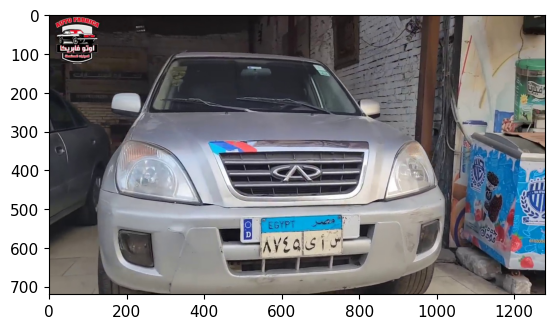

In [162]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\2.jpg")
imgplot = plt.imshow(img)
plt.show()

['8756', ['ل', 'أ', 'م'], 'كفر الشيخ']


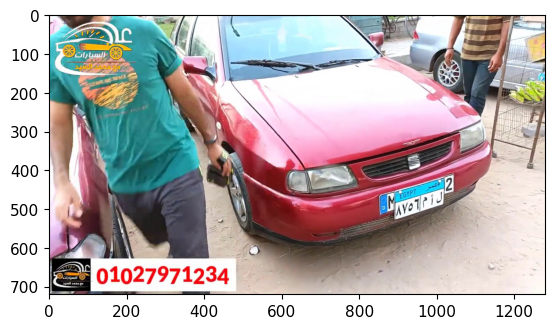

In [195]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\4.jpg")
imgplot = plt.imshow(img)
plt.show()

['9687', ['ب', 'ي', 'ص'], 'البحيرة']


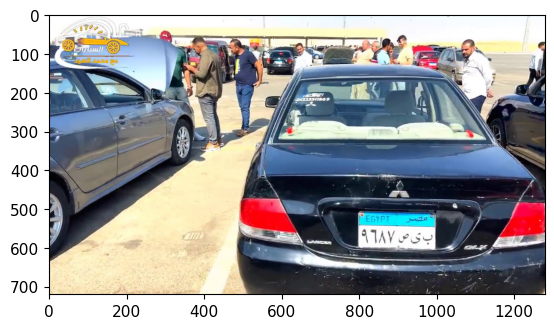

In [233]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\15.jpg")
imgplot = plt.imshow(img)
plt.show()

['1953', ['د', 'س', 'ي'], 'الدقهلية']


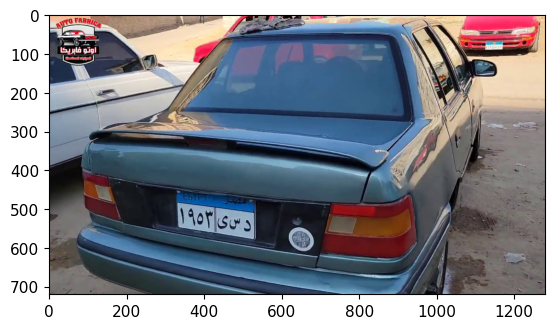

In [266]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\17.jpg")
imgplot = plt.imshow(img)
plt.show()

['1629', ['و', 'ن', 'ق'], 'بني سويف']


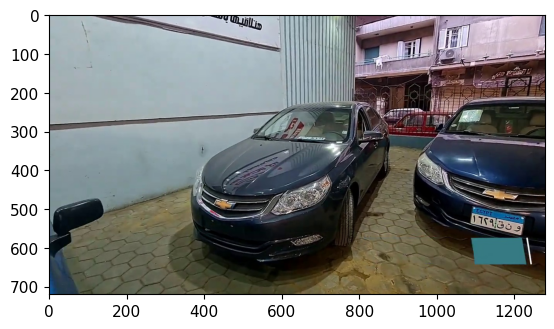

In [291]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\21.jpg")
imgplot = plt.imshow(img)
plt.show()

['385', ['ر', 'ي', 'و'], 'القاهرة']


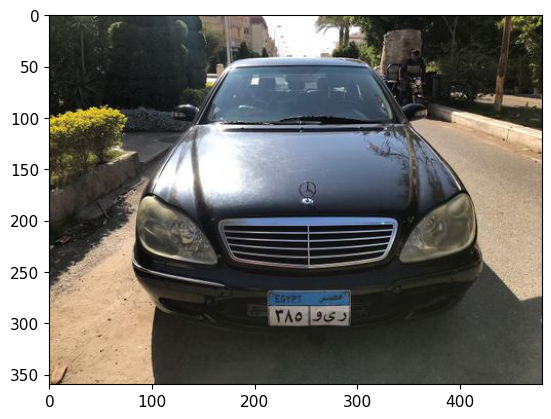

In [119]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['7286', ['أ', 'ن', 'ل'], 'القاهرة']


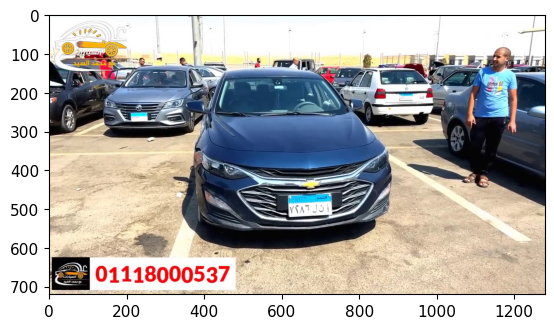

In [191]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['6182', ['ق', 'م'], 'الجيزة']


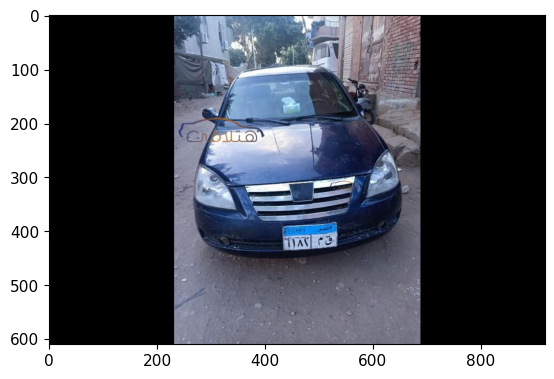

In [143]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['9692', ['ي', 'ن'], 'الجيزة']


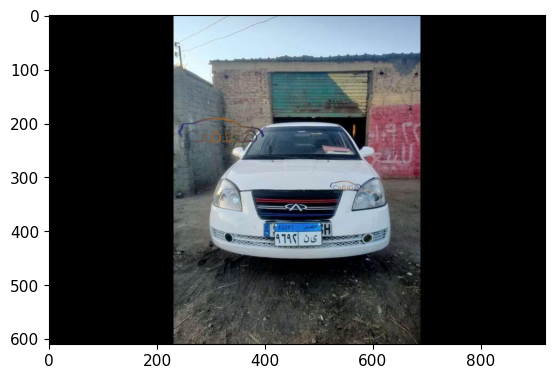

In [373]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['5383', ['ط', 'و', 'ر'], 'أخرى']


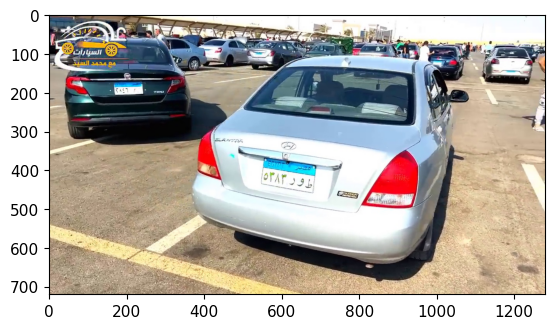

In [245]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['6666', ['ل', 'ل', 'ل'], 'كفر الشيخ']


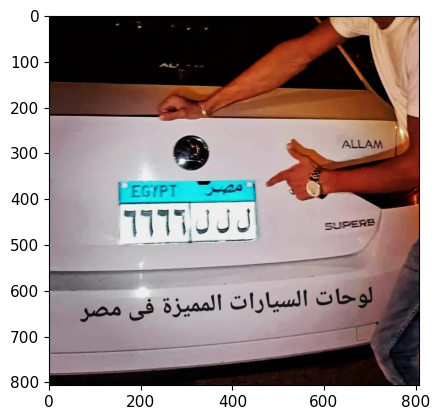

In [273]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['3', ['م', 'م'], 'أخرى']


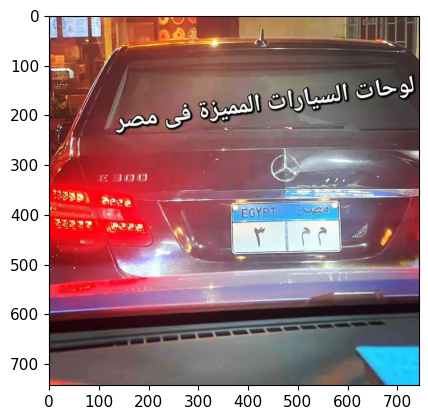

In [312]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['1352', ['ف', 'د', 'ر'], 'الفيوم']


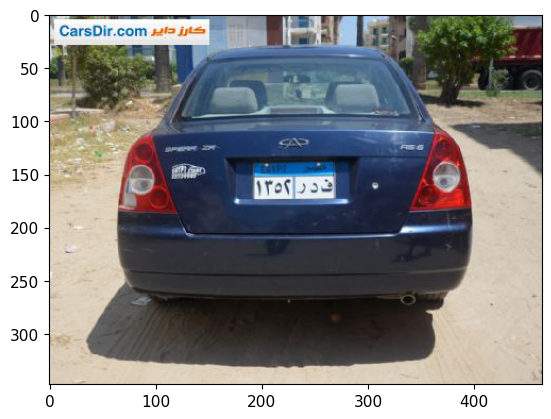

In [449]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['769', ['ص', 'ط', 'ق'], 'القاهرة']


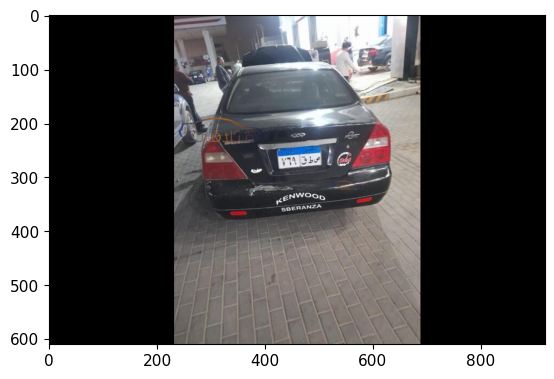

In [474]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['2521', ['ج', 'ي', 'ن'], 'أخرى']


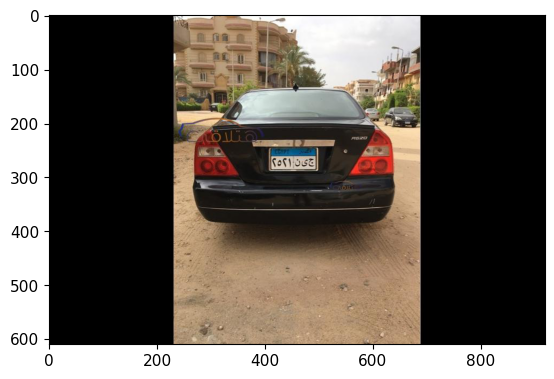

In [499]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['6846', ['أ', 'ج', 'د'], 'القاهرة']


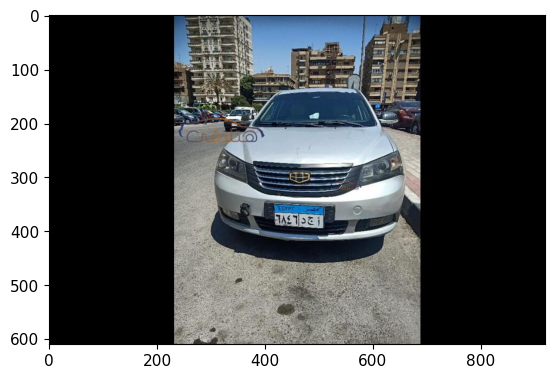

In [538]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['5925', ['ه', 'ه'], 'الجيزة']


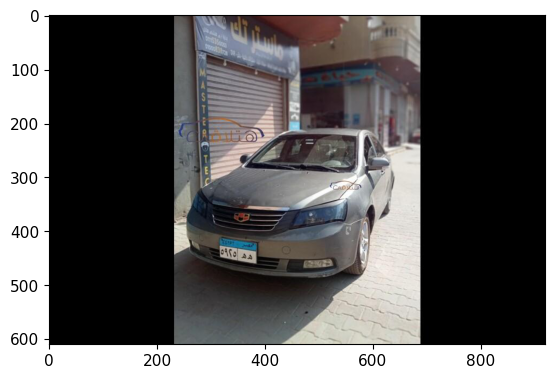

In [563]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

['2563', ['س', 'ه', 'ي'], 'الإسكندرية']


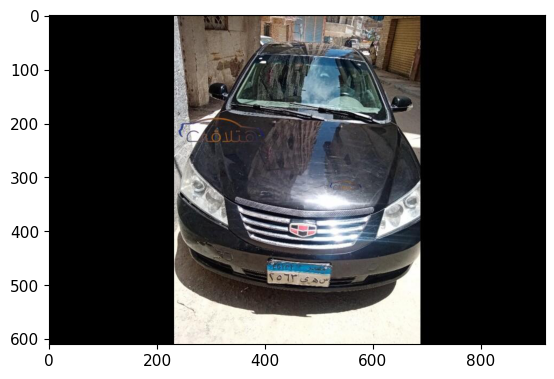

In [616]:
print(final_result)
img = mpimg.imread(r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\images\test.jpg")
imgplot = plt.imshow(img)
plt.show()

In [592]:
folder_path = r'F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\yolov5\runs\detect\exp'

# Use shutil.rmtree() to remove the folder and its contents
shutil.rmtree(folder_path)

In [593]:
img_path = r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\saved_images"

In [595]:
img_path = r"F:\egyptian car plates dataset\EALPR Vechicles dataset\plates models\detection_model\model3\resized_images"

In [596]:
for img in os.listdir(img_path):
    new_path = img_path + "\\" + img
    
    # Use os.remove() to delete the file
    os.remove(new_path)